In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [5]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_sampled_series(token, w=5, h=5):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    plt.plot(series)
    plt.show()

a


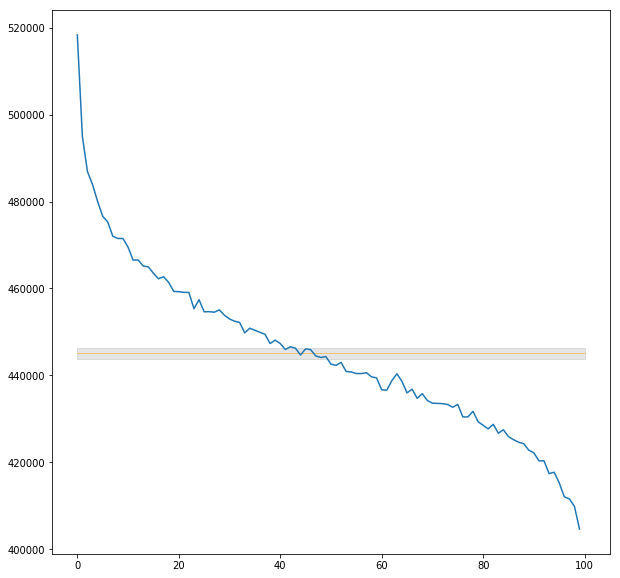

In [6]:
plot_sampled_series('a', 10, 10)

In [13]:
def bin_zscores(series):
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))

    avg_std = samples.std(1).mean()

    return np.array([
        (observed-expected) / avg_std
        for observed in series
    ])

In [39]:
from scipy import stats

def series_chisquare(series):
    
    expected = series.sum() / len(series)
    uniform = np.full(len(series), expected)
    
    return stats.chisquare(series, uniform)

In [40]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

In [41]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    series = BinCount.token_series(token)
    
    zscores = abs(bin_zscores(series))
    
    chi = series_chisquare(series)
    
    data.append(dict(
        token=token,
        count=count,
        zscore_sum=zscores.sum(),
        zscore_max=zscores.max(),
        chi_stat=chi.statistic,
        chi_p=chi.pvalue,
    ))
    
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [42]:
import pandas as pd

pd.set_option('display.max_rows', 1000)

df = pd.DataFrame(data)

top_500_sum = df.sort_values('zscore_sum', ascending=False).head(500)
top_500_max = df.sort_values('zscore_max', ascending=False).head(500)

In [43]:
top_500_sum

,chi_p,chi_stat,count,token,zscore_max,zscore_sum
6,0.000000e+00,83315.424513,44510387,a,110.874162,2250.379133
15,0.000000e+00,96863.255295,20487595,you,211.434949,1949.957367
7,0.000000e+00,101300.818804,34933931,”,245.936611,1774.887662
8,0.000000e+00,76599.976262,32574587,i,173.587746,1772.362206
2,0.000000e+00,78820.650937,111130017,the,222.426075,1543.405389
5,0.000000e+00,81168.949273,50833243,of,224.387582,1468.563500
23,0.000000e+00,50347.668391,12766593,?,150.691905,1437.320065
163,0.000000e+00,31014.265564,1518368,young,53.728894,1435.436514
1,0.000000e+00,56904.238443,115472128,.,164.885021,1430.579773
216,0.000000e+00,44230.570497,1147028,years,118.164142,1389.060693


In [45]:
top_500_max

,chi_p,chi_stat,count,token,zscore_max,zscore_sum
446,0.000000e+00,136700.921457,452057,chapter,367.946056,747.783787
1842,0.000000e+00,69649.772190,95391,i.,264.220538,542.891281
7,0.000000e+00,101300.818804,34933931,”,245.936611,1774.887662
5,0.000000e+00,81168.949273,50833243,of,224.387582,1468.563500
2,0.000000e+00,78820.650937,111130017,the,222.426075,1543.405389
15,0.000000e+00,96863.255295,20487595,you,211.434949,1949.957367
8,0.000000e+00,76599.976262,32574587,i,173.587746,1772.362206
19,0.000000e+00,49126.156959,16921467,“,170.223317,1220.931184
1,0.000000e+00,56904.238443,115472128,.,164.885021,1430.579773
23,0.000000e+00,50347.668391,12766593,?,150.691905,1437.320065
